In [ ]:
import numpy as numpy 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Read file to python

Source of data: https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce

In [ ]:
order_items= pd.read_csv('https://raw.githubusercontent.com/NgocKhanh29201/Brazilian-E-commerce-Analysis/main/olist_order_items_dataset.csv')
order_reviews= pd.read_csv('https://raw.githubusercontent.com/NgocKhanh29201/Brazilian-E-commerce-Analysis/main/olist_order_reviews_dataset.csv')
products= pd.read_csv('https://raw.githubusercontent.com/NgocKhanh29201/Brazilian-E-commerce-Analysis/main/olist_products_dataset.csv')
product_name_english= pd.read_csv('https://raw.githubusercontent.com/NgocKhanh29201/Brazilian-E-commerce-Analysis/main/product_category_name_translation.csv')
geolocation= pd.read_csv('olist_geolocation_dataset.csv')
customers= pd.read_csv('https://raw.githubusercontent.com/NgocKhanh29201/Brazilian-E-commerce-Analysis/main/olist_customers_dataset.csv')
orders= pd.read_csv('https://raw.githubusercontent.com/NgocKhanh29201/Brazilian-E-commerce-Analysis/main/olist_orders_dataset.csv')

#### Phân tích số lượng sản phẩm đã bán được với từng danh mục sản phẩm

In [ ]:
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [ ]:
order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


DataFrame order_items gồm 7 features:
- Features dạng numerical: ['order_item_id', 'price', 'freight_value']
- Features dạng categorical: ['order_id', 'product_id', 'seller_id', 'shipping_limit_date']

Không chứa missing values 

In [ ]:
# đổi tên cột order_item_id -> quantity
order_items.rename(columns={'order_item_id':'quantity'}, inplace= True)
order_items.head()

,order_id,quantity,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [ ]:
order_items.describe()

,quantity,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


In [ ]:
order_items.describe(include='object')

,order_id,product_id,seller_id,shipping_limit_date
count,112650,112650,112650,112650
unique,98666,32951,3095,93318
top,8272b63d03f5f79c56e9e4120aec44ef,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,2017-07-21 18:25:23
freq,21,527,2033,21


In [ ]:
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [ ]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


DataFrame products ngoại trừ product_id các features khác đều chứa missing value

Xử lý missing value

In [ ]:
products=products.drop(columns=['product_name_lenght','product_description_lenght','product_photos_qty'])

In [ ]:
# Điền giá trị mean vào các vị trí missing value với các biến numerical
num_var= products.select_dtypes(include='number').columns
means= products[num_var].mean()
products[num_var]= products[num_var].fillna(means)
# Điền giá trị mod vào các vị trí missing value với các biến obj
obj_var= products.select_dtypes(include='object').columns
modes= products[obj_var].mode()
products[obj_var]= products[obj_var].fillna(modes.to_dict(orient='record')[0])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: Using short name for 'orient' is deprecated. Only the options: ('dict', list, 'series', 'split', 'records', 'index') will be used in a future version. Use one of the above to silence this warning.
  


In [ ]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   product_id             32951 non-null  object 
 1   product_category_name  32951 non-null  object 
 2   product_weight_g       32951 non-null  float64
 3   product_length_cm      32951 non-null  float64
 4   product_height_cm      32951 non-null  float64
 5   product_width_cm       32951 non-null  float64
dtypes: float64(4), object(2)
memory usage: 1.5+ MB


##### Những danh mục sản phẩm có số lượng bán nhiều nhất và ít nhất

In [ ]:
product_sale= order_items.merge(products,on='product_id', how='inner')
product_sale.head()

,order_id,quantity,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,cool_stuff,650.0,28.0,9.0,14.0
1,130898c0987d1801452a8ed92a670612,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-07-05 02:44:11,55.9,17.96,cool_stuff,650.0,28.0,9.0,14.0
2,532ed5e14e24ae1f0d735b91524b98b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2018-05-23 10:56:25,64.9,18.33,cool_stuff,650.0,28.0,9.0,14.0
3,6f8c31653edb8c83e1a739408b5ff750,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-07 18:55:08,58.9,16.17,cool_stuff,650.0,28.0,9.0,14.0
4,7d19f4ef4d04461989632411b7e588b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-16 22:05:11,58.9,13.29,cool_stuff,650.0,28.0,9.0,14.0


In [ ]:
# Số lượng đã bán với từng danh mục sản phẩm
quantity_sale_product= product_sale.groupby('product_category_name')['quantity'].sum()
quantity_sale_product= pd.DataFrame(quantity_sale_product)

In [ ]:
# Số lượng bán với từng danh mục sản phẩm (name- english, order desc)
product_name_english.set_index('product_category_name')
quantity_sale_product=quantity_sale_product.merge(product_name_english, on='product_category_name').set_index('product_category_name_english')
quantity_sale_product= quantity_sale_product[['quantity']].sort_values(by='quantity', ascending = False)
quantity_sale_product


,quantity
product_category_name_english,
bed_bath_table,15543
furniture_decor,11540
health_beauty,11081
sports_leisure,9932
computers_accessories,9874
...,...
arts_and_craftmanship,26
cds_dvds_musicals,16
la_cuisine,16


In [ ]:
quantity_sale_product.describe()

,quantity
count,71.000000
mean,1900.126761
std,3284.170280
min,2.000000
25%,99.000000
50%,365.000000
75%,2271.500000
max,15543.000000


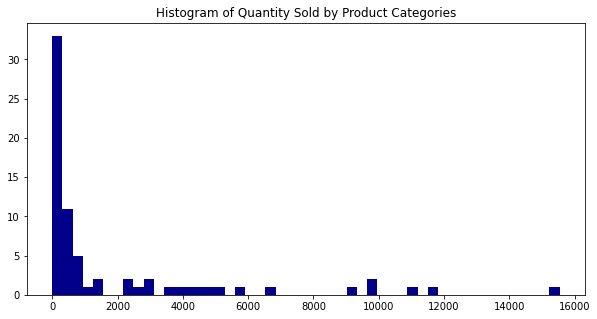

In [ ]:
plt.figure(figsize=(10,5))
plt.hist(quantity_sale_product['quantity'], bins=50 , color='darkblue')
plt.title('Histogram of Quantity Sold by Product Categories')
plt.show()

Trực quan số lượng sản phẩm đã bán với mỗi danh mục sản phẩm dao động lớn, các danh mục bán được số lượng < 2000 sản phẩm chiếm đa số.

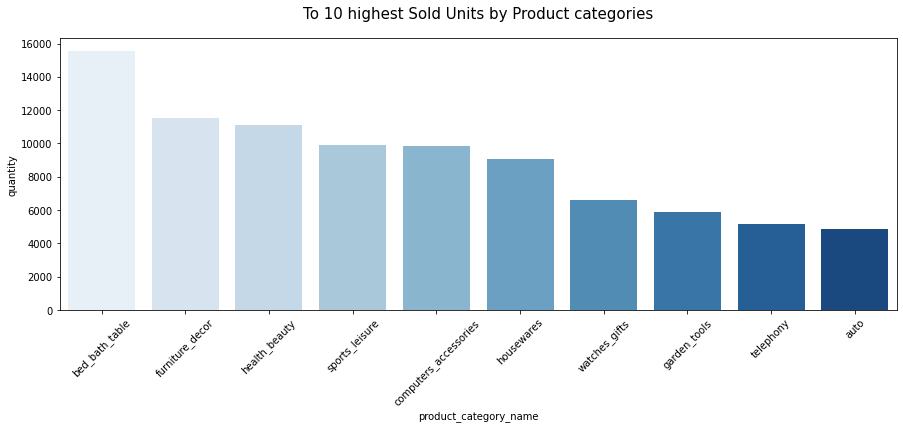

In [ ]:
fig, ax= plt.subplots(figsize=(15,5))
sns.barplot(x='product_category_name_english', y='quantity', data= quantity_sale_product.reset_index().head(10),palette='Blues',ax=ax)
ax.set_title('To 10 highest Sold Units by Product categories',y=1.05, fontsize=15)
ax.set(xlabel= 'product_category_name', ylabel= 'quantity')
plt.xticks(rotation=45)
plt.show()

Đồ thị trên là top 10 danh mục sản phẩm bán được nhiều nhất từ 10/2016 đến 10/2018
Nhận thấy các danh mục đều có số lượng đã bán là trên 4000 sản phẩm

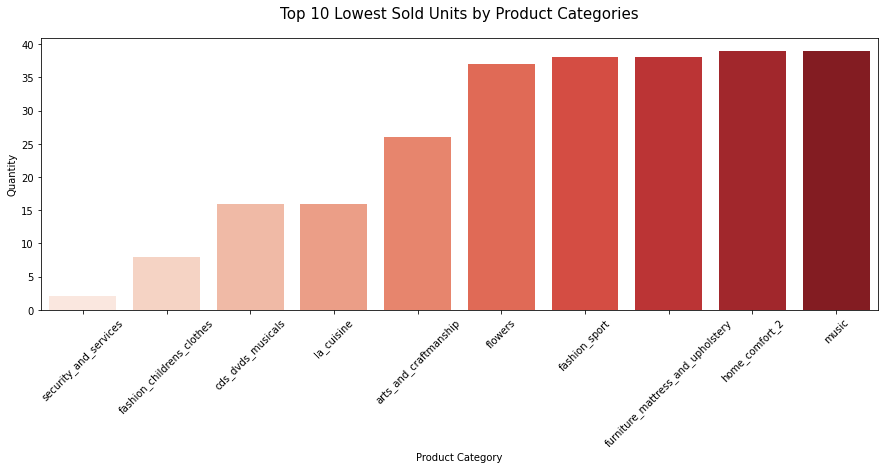

In [ ]:
fig, ax= plt.subplots(figsize=(15,5))
sns.barplot(x='product_category_name_english',y='quantity',
              data=quantity_sale_product.reset_index().sort_values(by='quantity',ascending=True).head(10),
              palette='Reds', ax=ax)
ax.set_title('Top 10 Lowest Sold Units by Product Categories',y=1.05, fontsize= 15)
ax.set(xlabel='Product Category',
      ylabel='Quantity')
plt.xticks(rotation=45)
plt.show()


Đồ thị trên là 10 danh mục sản phẩm có số lượng sản phẩm bán được ít nhất trong giai đoạn 10/2016 đến 10/2018, số lượng sản phẩm đã bán được với mỗi danh mục đều dưới 40 sản phẩm

#### Phân tích sự ảnh hưởng của review score đến số lượng bán của sản phẩm

In [ ]:
order_reviews1=order_reviews
order_reviews1.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [ ]:
order_reviews1=order_reviews1.drop(['review_comment_title','review_comment_message','review_creation_date','review_answer_timestamp'],axis=1)

In [ ]:
order_reviews1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   review_id     99224 non-null  object
 1   order_id      99224 non-null  object
 2   review_score  99224 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.3+ MB


In [ ]:
order_reviews1.describe()

,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


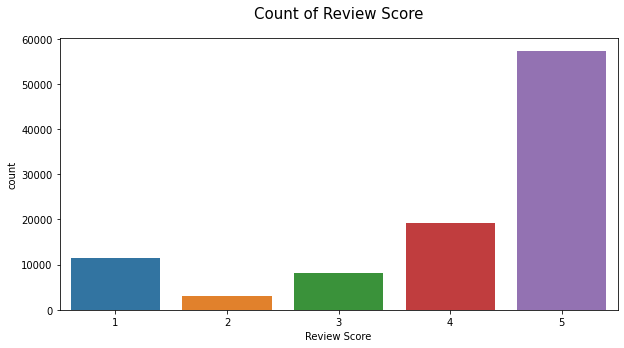

In [ ]:
fig, ax= plt.subplots(figsize=(10,5))
sns.countplot(x='review_score', data=order_reviews1,ax=ax)
ax.set_title('Count of Review Score', y= 1.05, fontsize= 15)
ax.set(xlabel='Review Score')
plt.show();

In [ ]:
review_score_of_products= pd.merge(product_sale[['order_id','quantity','product_id','product_category_name']], order_reviews1, on='order_id')
review_score_of_products

,order_id,quantity,product_id,product_category_name,review_id,review_score
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,cool_stuff,97ca439bc427b48bc1cd7177abe71365,5
1,130898c0987d1801452a8ed92a670612,1,4244733e06e7ecb4970a6e2683c13e61,cool_stuff,b11cba360bbe71410c291b764753d37f,5
2,532ed5e14e24ae1f0d735b91524b98b9,1,4244733e06e7ecb4970a6e2683c13e61,cool_stuff,af01c4017c5ab46df6cc810e069e654a,4
3,6f8c31653edb8c83e1a739408b5ff750,1,4244733e06e7ecb4970a6e2683c13e61,cool_stuff,8304ff37d8b16b57086fa283fe0c44f8,5
4,7d19f4ef4d04461989632411b7e588b9,1,4244733e06e7ecb4970a6e2683c13e61,cool_stuff,426f43a82185969503fb3c86241a9535,5
...,...,...,...,...,...,...
112367,ffebd80e3291e811c308365936897efd,1,4cc4d02efc8f249c13355147fb44e34d,ferramentas_jardim,d8b7a27e0ca2736c310d24a87bcba62a,5
112368,ffee31fb4b5e35c9123608015637c495,1,b10ecf8e33aaaea419a9fa860ea80fb5,moveis_decoracao,4e78f83fed69a70a3eb2796a9f24b368,4
112369,fff7c4452f050315db1b3f24d9df5fcd,1,dd469c03ad67e201bc2179ef077dcd48,relogios_presentes,18fd272eb3b30d832d8f459ca0bfc24b,5
112370,fffa82886406ccf10c7b4e35c4ff2788,1,bbe7651fef80287a816ead73f065fc4b,esporte_lazer,b49f4e0ca71a9801d56ff4e47cff1ded,4


In [ ]:
# Tổng lượng mua và trung bình reviews_score với mỗi product_category
review_score_of_products= review_score_of_products.groupby('product_category_name').agg({'quantity':'sum','review_score':'mean'})

In [ ]:
review_score_of_products

,quantity,review_score
product_category_name,,
agro_industria_e_comercio,265,4.000000
alimentos,572,4.218182
alimentos_bebidas,366,4.315412
artes,228,3.937198
artes_e_artesanato,26,4.125000
...,...,...
sinalizacao_e_seguranca,305,4.086294
tablets_impressao_imagem,87,4.123457
telefonia,5131,3.946867


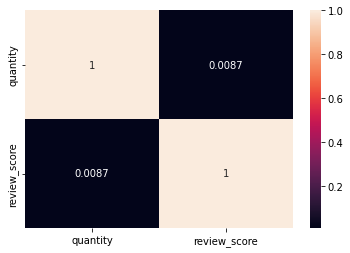

In [ ]:
sns.heatmap(review_score_of_products.corr(),annot= True);

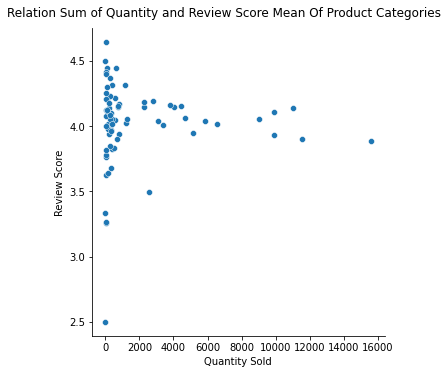

In [ ]:
g=sns.relplot(x='quantity', y='review_score',data= review_score_of_products,kind='scatter')
g.fig.suptitle("Relation Sum of Quantity and Review Score Mean Of Product Categories", y=1.03)
g.set(xlabel='Quantity Sold', ylabel='Review Score')
plt.show()

Trực quan từ heatmap và sơ đồ phân tán nhận thấy giữa số lượng đã bán (quantity) và review_score không có tương quan tuyến tính

#### Customers Repurchase

In [ ]:
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


Phân bố của khách hàng theo geolocation state

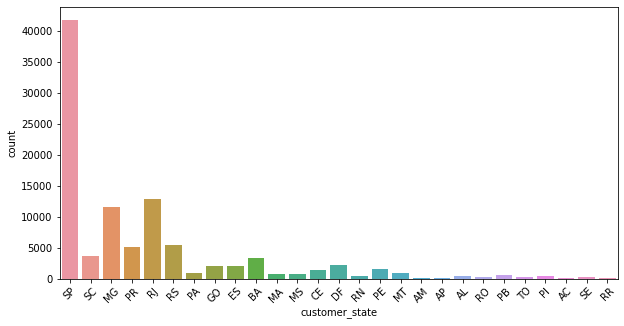

In [ ]:
fig, ax= plt.subplots(figsize=(10,5))
sns.countplot(x='customer_state', data= customers, ax=ax);
plt.xticks(rotation=45)
plt.show();


In [ ]:
print(customers.loc[customers['customer_state'].isin(['SP','RJ','MG','RS','PR'])]['customer_unique_id'].count()/customers['customer_unique_id'].nunique())


0.7986180486180486


Khoảng 80% customer đều tập trung tại bang São Paulo (SP), Rio de Janeiro (RJ), Minas Gerais (MG), Rio Grande do Sul (RS),
Parana (PR)

Customer Repurchase

In [ ]:
customer_repurchase= customers[['customer_unique_id','customer_id']]. groupby('customer_unique_id').customer_id.count()
customer_repurchase= pd.DataFrame(customer_repurchase)
customer_repuchase=customer_repurchase.rename(columns={'customer_id': 'num_of_purchases'})

In [ ]:
customer_state= customers[['customer_unique_id','customer_state']]
customer_state.drop_duplicates(inplace= True)
customer_repurchase= customer_repuchase.merge(customer_state, on='customer_unique_id')
customer_repurchase.head()

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,customer_unique_id,num_of_purchases,customer_state
0,0000366f3b9a7992bf8c76cfdf3221e2,1,SP
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,SP
2,0000f46a3911fa3c0805444483337064,1,SC
3,0000f6ccb0745a6a4b88665a16c9f078,1,PA
4,0004aac84e0df4da2b147fca70cf8255,1,SP


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


array([ 1,  2,  3,  4,  6,  7,  5,  9, 17])

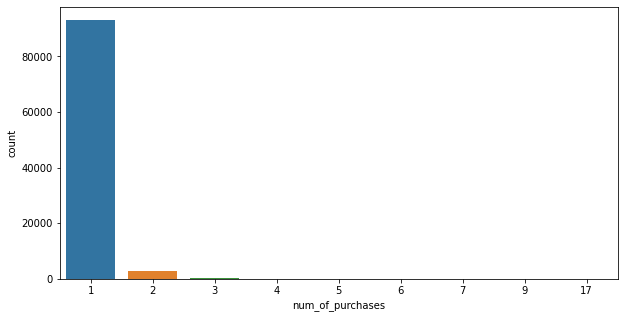

In [ ]:
fig, ax= plt.subplots(figsize=(10,5))
sns.countplot(customer_repurchase['num_of_purchases'],ax=ax)
customer_repurchase['num_of_purchases'].unique()

In [ ]:
churn_rate= customer_repurchase.loc[customer_repurchase['num_of_purchases']==1]['customer_unique_id'].count()/customer_repurchase['customer_unique_id'].nunique()
churn_rate

0.9688124375624375

Hầu hết số lần mua của mỗi khách hàng là 1 lần, tỷ lệ rời bỏ Olist của khách hàng là 96,9%

###Hypothesis Testing

### Kiểm định chênh lệch của estimated delivery day với actual delivery day có theo phân phối chuẩn

In [ ]:
orders= pd.read_csv('https://raw.githubusercontent.com/NgocKhanh29201/Brazilian-E-commerce-Analysis/main/olist_orders_dataset.csv')

In [ ]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,02/10/2017 10:56,02/10/2017 11:07,04/10/2017 19:55,10/10/2017 21:25,18/10/2017 00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,24/07/2018 20:41,26/07/2018 03:24,26/07/2018 14:31,07/08/2018 15:27,13/08/2018 00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,08/08/2018 08:38,08/08/2018 08:55,08/08/2018 13:50,17/08/2018 18:06,04/09/2018 00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,18/11/2017 19:28,18/11/2017 19:45,22/11/2017 13:39,02/12/2017 00:28,15/12/2017 00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,13/02/2018 21:18,13/02/2018 22:20,14/02/2018 19:46,16/02/2018 18:17,26/02/2018 00:00


In [ ]:
import datetime as dt
orders['order_purchase_timestamp']= pd.to_datetime(orders['order_purchase_timestamp'], dayfirst= True)
orders['order_delivered_customer_date']= pd.to_datetime(orders['order_delivered_customer_date'], dayfirst= True)
orders['order_estimated_delivery_date']= pd.to_datetime(orders['order_estimated_delivery_date'], dayfirst= True)
orders['estimated_delivery_day']= (orders['order_estimated_delivery_date']- orders['order_purchase_timestamp']).dt.days
orders['actual_delivery_day']= (orders['order_delivered_customer_date']- orders['order_purchase_timestamp']).dt.days

In [ ]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,estimated_delivery_day,actual_delivery_day
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:00,02/10/2017 11:07,04/10/2017 19:55,2017-10-10 21:25:00,2017-10-18,15,8.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:00,26/07/2018 03:24,26/07/2018 14:31,2018-08-07 15:27:00,2018-08-13,19,13.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:00,08/08/2018 08:55,08/08/2018 13:50,2018-08-17 18:06:00,2018-09-04,26,9.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:00,18/11/2017 19:45,22/11/2017 13:39,2017-12-02 00:28:00,2017-12-15,26,13.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:00,13/02/2018 22:20,14/02/2018 19:46,2018-02-16 18:17:00,2018-02-26,12,2.0


In [ ]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  object        
 5   order_delivered_carrier_date   97658 non-null  object        
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
 8   estimated_delivery_day         99441 non-null  int64         
 9   actual_delivery_day            96476 non-null  float64       
dtypes: datetime64[ns](3), float64(1), int64(1), object(5)
memory usage: 7.6+ MB


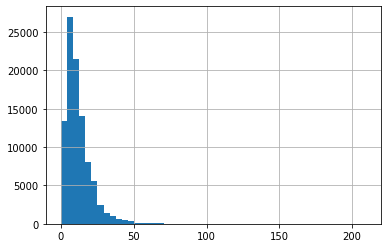

In [ ]:
orders['actual_delivery_day'].hist(bins=50);

In [ ]:
orders['actual_delivery_day']=orders['actual_delivery_day'].fillna(orders['actual_delivery_day'].median())

Text(0.5, 1.0, 'Difference Between Estimated And Actual Delivery Days')

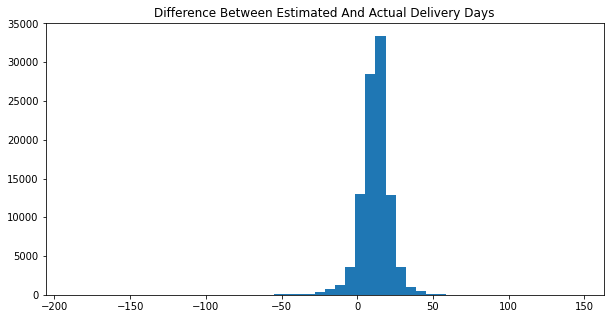

In [ ]:
diff_delivery_days= orders['estimated_delivery_day']- orders['actual_delivery_day']
fig, ax= plt.subplots(figsize=(10,5))
ax.hist(diff_delivery_days, bins= 50)
ax.set_title('Difference Between Estimated And Actual Delivery Days')

In [ ]:
print((diff_delivery_days>0).sum()/orders.shape[0])

0.9108516607837813


Hầu hết các đơn hàng (91%) đều giao trước thời điểm dự kiến

In [ ]:
# Shapiro- Wilk Normality Test
from scipy.stats import shapiro
stat, p= shapiro(diff_delivery_days)
print('stat= %.3f, p= %.3f'%(stat, p))
if p> 0.05:
  print('Probably Gaussian')
else:
  print('Probably not Gaussian')

stat= 0.877, p= 0.000
Probably not Gaussian


/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


#### Kiểm định số lượng sản phẩm bán trung bình bán/ ngày của năm 2017 có bằng số lượng bán trung bình năm 2018 hay khôn

In [ ]:
order_items['shipping_limit_date']=pd.to_datetime(order_items['shipping_limit_date'], dayfirst= True)
order_items['shipping_limit_date']=order_items['shipping_limit_date'].dt.date
order_items['shipping_limit_date']=pd.to_datetime(order_items['shipping_limit_date'], dayfirst= True)

In [ ]:
# Số lượng hàng bán theo ngày
sale_quantity_by_day= pd.DataFrame(order_items.groupby('shipping_limit_date')['quantity'].sum()).reset_index()
# Số lượng bán năm 2017
sale_quantity_2017= sale_quantity_by_day.loc[sale_quantity_by_day['shipping_limit_date'].dt.year==2017]['quantity']
# Số lượng bán năm 2018
sale_quantity_2018= sale_quantity_by_day.loc[sale_quantity_by_day['shipping_limit_date'].dt.year==2018]['quantity']


In [ ]:
# Student's t- test
from scipy.stats import ttest_ind
stat, p = ttest_ind(sale_quantity_2017, sale_quantity_2018)
print('stat= %.3f, p=%.3f' %(stat, p))
if p>0.05:
  print('Probably the same distribution')
else:
  print('Probably different distributions')

stat= -8.586, p=0.000
Probably different distributions


Với độ tin cậy 95% thì có thể kết luận rằng trung bình số lượng sản phẩm bán trên ngày của năm 2017 và năm 2018 là khác nhau